<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#diamonds" data-toc-modified-id="diamonds-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>diamonds</a></span><ul class="toc-item"><li><span><a href="#Gradien-Boosting-Regressor-from-Scratch" data-toc-modified-id="Gradien-Boosting-Regressor-from-Scratch-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Gradien Boosting Regressor from Scratch</a></span></li><li><span><a href="#tuning" data-toc-modified-id="tuning-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>tuning</a></span><ul class="toc-item"><li><span><a href="#sklearn" data-toc-modified-id="sklearn-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>sklearn</a></span></li><li><span><a href="#custom" data-toc-modified-id="custom-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>custom</a></span></li></ul></li></ul></li></ul></div>

# diamonds

In [1]:
import numpy as np              # для работы с массивами чисел
import pandas as pd             # для работы с таблицами

import matplotlib.pyplot as plt # для работы с графиками
import seaborn as sns           # для работы с красивыми графиками из pd.DataFrame



In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# стиль графиков
sns.set(style='darkgrid', palette='pastel', color_codes=True)

# задать размер графиков
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
X = df.drop('price',axis=1)
X = pd.get_dummies(X)
y = df['price']/1000

X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [5]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=3, learning_rate=0.1, max_depth=5)
gb.fit(X,y)

GradientBoostingRegressor(max_depth=5, n_estimators=3)

In [6]:
X_small = X.sample(2)
y_small = y[X_small.index]
X_small

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
10856,1.13,60.7,54.0,6.82,6.72,4.11,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
35144,0.31,61.2,58.0,4.35,4.38,2.67,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
# The estimator that provides the initial prediction
print(*gb.init_.predict(X_small), sep='\t')
print(*y_small.values, sep='\t')

3.9327997219132373	3.9327997219132373
4.873	0.89


In [8]:
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 3,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [9]:
lr = gb.get_params()['learning_rate']
lr

0.1

In [10]:
y_small - gb.init_.predict(X_small)

10856    0.9402
35144   -3.0428
Name: price, dtype: float64

In [11]:
# The collection of fitted sub-estimators
gb.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      random_state=RandomState(MT19937) at 0x13CF42DB0)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      random_state=RandomState(MT19937) at 0x13CF42DB0)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      random_state=RandomState(MT19937) at 0x13CF42DB0)]],
      dtype=object)

In [12]:
y_small.values

array([4.873, 0.89 ])

In [13]:
# y_hat_1
y_hat_1 = gb.init_.predict(X_small)                  

s_hat_2 = lr*gb.estimators_[0][0].predict(X_small)

# y_hat_3 = y_hat_1 + s_hat_1 + s_hat_2 \
s_hat_3 = lr*gb.estimators_[1][0].predict(X_small)   

In [14]:
y_hat_1 + s_hat_2

array([4.00181162, 3.61358468])

In [15]:
y_hat_1 + s_hat_2 + s_hat_3

array([4.06421848, 3.32032085])

In [16]:
y_small.values

array([4.873, 0.89 ])

In [17]:
[y for y in gb.staged_predict(X_small)]

[array([4.00181162, 3.61358468]),
 array([4.06421848, 3.32032085]),
 array([4.21232932, 3.06254713])]

In [18]:
y_small.values

array([4.873, 0.89 ])

In [19]:
[y-y_small.values for y in gb.staged_predict(X_small)]

[array([-0.87118838,  2.72358468]),
 array([-0.80878152,  2.43032085]),
 array([-0.66067068,  2.17254713])]

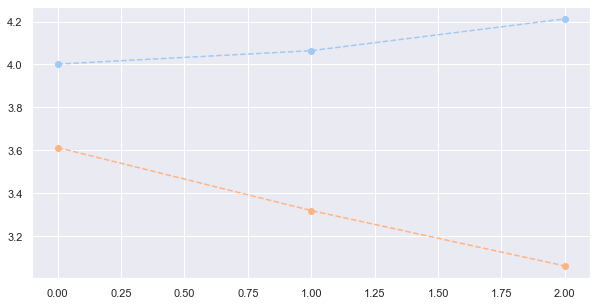

In [20]:
plt.plot([y for y in gb.staged_predict(X_small)], '--o')

#plt.hlines(xmin=0, xmax=5, y=y_small.values, ':')
plt.show()

In [21]:
y_small

10856    4.873
35144    0.890
Name: price, dtype: float64

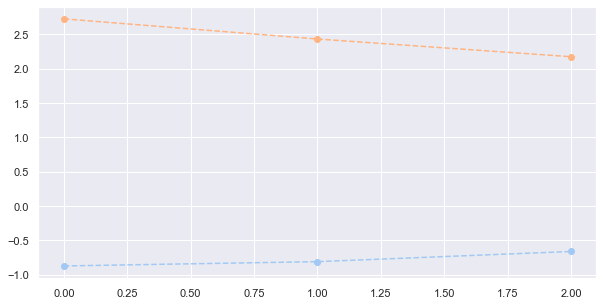

In [22]:
plt.plot([y-y_small.values for y in gb.staged_predict(X_small)], '--o')


#plt.hlines(xmin=0, xmax=5, y=y_small.values, ':')


plt.show()

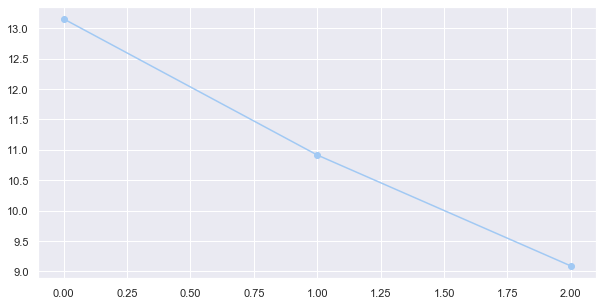

In [23]:
plt.plot(gb.train_score_, '-o')

## Gradien Boosting Regressor from Scratch

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
from copy import deepcopy

In [25]:
class GradienBoostingRegressorFromScratch(BaseEstimator):
    def __init__(self,
                 n_estimators=10, lr=0.1,
                 max_depth=5, min_samples_leaf=10,
                 **params
                ):
        '''
        n_estimators - кол-во итераций в градиентном бустинге
        lr - темп обучения
        base_estimator - базовая модель
        '''
        self.n_estimators = n_estimators
        self.lr=lr
        
        self.max_depth=max_depth
        self.min_samples_leaf=min_samples_leaf
        
        self.base_estimator = DecisionTreeRegressor(
            max_depth=max_depth, 
            min_samples_leaf=min_samples_leaf,
            **params
        )
        
    def fit(self, X, y):
        self.init_pred = y.mean()
        y_pred = np.array([self.init_pred]*y.shape[0])
        error = y-y_pred
        
        self.estimators_ = []
        self.mse_ = []
        for i in range(self.n_estimators):
            self.base_estimator.fit(X, error)            
            error_pred = self.base_estimator.predict(X)
            y_pred += self.lr * error_pred
            error = y - y_pred
            self.estimators_.append(deepcopy(self.base_estimator))
            self.mse_.append(mean_squared_error(y,y_pred))
            
            
    
    def predict(self, X):
        y_pred = np.array([self.init_pred]*X.shape[0])
        for i in range(self.n_estimators):
            error_pred = self.estimators_[i].predict(X)
            y_pred += self.lr * error_pred
        return y_pred
        
        

In [26]:
gbm = GradienBoostingRegressorFromScratch(n_estimators=50, lr=0.1, max_features=1)
gbm.fit(X, y)

In [27]:
len(gbm.estimators_)

50

In [28]:
X_small

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
10856,1.13,60.7,54.0,6.82,6.72,4.11,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
35144,0.31,61.2,58.0,4.35,4.38,2.67,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
print(y_small.values)
print(gbm.predict(X_small))

[4.873 0.89 ]
[4.99098356 1.17137443]


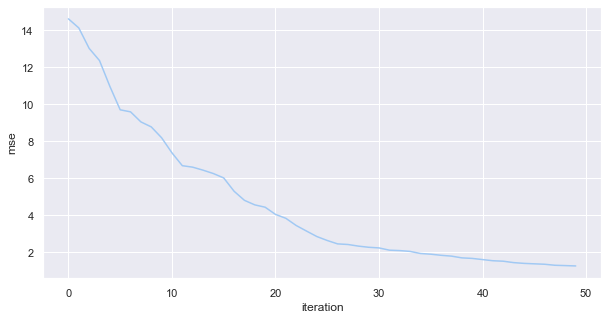

In [30]:
plt.plot(gbm.mse_)
plt.xlabel('iteration')
plt.ylabel('mse'); #plt.yscale('log')
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [32]:
# without shuffling
cross_val_score(gbm, X, y , cv=3, scoring='r2')

array([-0.2012331 ,  0.49516658, -0.33195852])

In [33]:
# with shuffling
cv_kfold = KFold(n_splits=3, shuffle=True, random_state=42)
cross_val_score(gbm, X, y , cv=cv_kfold, scoring='r2')

array([0.9728687 , 0.97071722, 0.97263538])

## tuning

- tune on the model on the all samples and features
- choose max_depth + min_samples_leaf
    - lr = 0.1 (high)
    - n_estimators = 100 (small)
- choose on the fraction of samples and features on each iteration
- choose lr + n_estimators

### sklearn

In [34]:
from sklearn.model_selection import GridSearchCV

max_depth_ = [2**i for i in range(5)]
min_samples_leaf_ = np.linspace(1, 20, 10, dtype=int)

params = {
    'max_depth': max_depth_,
    'min_samples_leaf': min_samples_leaf_,
}

cv_kfold = KFold(n_splits=2, shuffle=True, random_state=42)
gbm = GradienBoostingRegressorFromScratch(n_estimators=100, lr=0.1)
gbm_cv = GridSearchCV(estimator=gbm, cv=cv_kfold, 
                      param_grid=params, verbose=2, 
                      scoring='neg_root_mean_squared_error', n_jobs=-1)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.95, random_state=42, shuffle=True)


gbm_cv.fit(X_train, y_train)


Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.6s finished


GridSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
             estimator=GradienBoostingRegressorFromScratch(n_estimators=100),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 4, 8, 16],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 20])},
             scoring='neg_root_mean_squared_error', verbose=2)

### custom

In [36]:
from tqdm.notebook import tqdm


model = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1,
    max_depth=max_depth, min_samples_leaf=min_samples_leaf
)
pairs = [(2,1),(4,3),(8,5),(16,15)]





def custom_grid_search():
    cv_results = {
        'max_depth' : [],
        'min_samples_leaf' : [],
        'mean_train_score': [],
        'mean_test_score': [],
        'model': []
    }
    for max_depth, min_samples_leaf in tqdm(pairs):
        cv_results['max_depth'].append(max_depth)
        cv_results['min_samples_leaf'].append(min_samples_leaf)

        scores_train, scores_test = [], []
        for train_index, test_index in cv_kfold.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model.fit(X_train,y_train)        
            scores_train.append(mean_squared_error(y_train, model.predict(X_train)))
            scores_test.append(mean_squared_error(y_test, model.predict(X_train)))

        cv_results['mean_train_score'].append(np.mean(scores_train))
        cv_results['mean_test_score'].append(np.mean(scores_test))

        cv_results['model'].append(model)
    return cv_results

NameError: name 'max_depth' is not defined

In [ ]:
def grid_search(X,y,grid,model):
    param1_name, param2_name = list(grid.keys())
    mse_train=dict()
    mses=dict()
    for param1 in tqdm(grid[param1_name]):
        for param2 in grid[param2_name]:
            params = {param1_name:param1, param2_name:param2}
            m = model(**params)
            for train_index, test_index in cv_kfold.split(X):
              X_train, X_test = X.iloc[train_index], X.iloc[test_index]
              

              m.fit(X_train,y_train)
              mse_fit = mean_squared_error(y_train, m.predict(X_train))
              mse_val = mean_squared_error(y_test, m.predict(X_test))
              mses[(param1,param2)]=mse_val
    best = np.argmax(list(mses.values()))
    best_param1 = list(mses.keys())[best][0]
    best_param2 = list(mses.keys())[best][1]
    print('best params: ',param1_name,'=',best_param1,',',param2_name,'=',best_param2)


    plt.figure(figsize=(8,4))
    plt.plot(np.array(list(mses.values())).reshape(len(grid[param1_name]),len(grid[param2_name])))
    plt.legend(grid[param2_name],title=param2_name)
    plt.xticks(np.arange(0,len(grid[param1_name])),grid[param1_name])
    plt.xlabel(param1_name)
    plt.ylabel('accuracy')
    plt.show()

In [ ]:
param1_name='max_depth'
params1=np.arange(1,17,2)

param2_name='n_estimators'
params2=[5,10,50,100]

grid = {param1_name:params1,param2_name:params2}

grid_search(X_train, y_train, grid, GradientBoostingRegressor)

In [ ]:
cv_results

<img src=https://pbs.twimg.com/media/DrWC8TrVYAAHRhl.jpg width=600>

In [ ]:
def get_train_test_score(model):
  N = model.n_estimators_
  test_score = np.zeros((N,), dtype=np.float64)
  for i, y_pred in enumerate(model.staged_predict(X_test)):
      test_score[i] = model.loss_(y_test, y_pred)

      
  plt.plot(np.arange(N) + 1, model.train_score_, 'b-', label='train-mse')
  plt.plot(np.arange(N) + 1, test_score, 'r-', label='test-mse')

  plt.vlines(x=test_score.argmin(), 
            ymin=min(np.min(model.train_score_), np.min(test_score)),
            ymax=max(np.max(model.train_score_), np.max(test_score)),
            colors='gray', linestyles=':'
            )


  plt.legend(loc='upper right')
  plt.xlabel('Boosting Iterations'); plt.ylabel('MSE')
  #plt.yscale('log'); #plt.xscale('log')
  plt.tight_layout()
  plt.show()

In [ ]:
get_train_test_score(cv_results['model'][3])

In [ ]:
cv_results['model'][0]

In [ ]:
cv_results['model'][3]

In [ ]:
for i,m in enumerate(max_depth_):
    
    plt.plot(cv_results['model'][i].mse_, label=f'{m}')
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.90, random_state=42, shuffle=True)

gbm_cv.fit(X_train, y_train)

In [ ]:
res_1 = pd.DataFrame(gbm_cv.cv_results_)
res_1.head()

In [ ]:
cols

In [ ]:
res_1['mean_test_score'] = -res_1['mean_test_score']

In [ ]:
sns.lineplot(data=res_1, y='mean_test_score', hue='param_max_depth', 
             x='param_min_samples_leaf')

In [ ]:
gbm_cv.best_params_

In [ ]:
gbm = GradienBoostingRegressorFromScratch(**gbm_cv.best_params_)

lr_ = np.logspace(-4,0,20)
n_estimators_ =np.logspace(1, 4, 10, dtype=int) # 10 ... 10000

params = {
    'lr': lr_,
    'n_estimators': n_estimators_,
}

gbm = GradienBoostingRegressorFromScratch(n_estimators=100, lr=0.1)
gbm_cv_2 = GridSearchCV(estimator=gbm, cv=cv_kfold, 
                      param_grid=params, verbose=2, 
                      scoring='neg_root_mean_squared_error', n_jobs=-1)




In [ ]:
gbm_cv_2.fit(X_train, y_train)